In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Code from Scratch

In [28]:
# returning hx for each sample hence, a numpy array of size (m X 1)
def hypothesis(X,theta):
    return np.sum(X*theta[1:], axis=1) + theta[0] # using numpy broadcasting

In [29]:
# retuning sigmoid for each sample hence, a numpy array of size (m X 1)
def sigmoid(X,theta):
    hx = hypothesis(X,theta)
    return 1.0 / (1.0 + np.exp(-1*hx))

In [30]:
def gradient(X,Y,theta):
    grad = np.zeros(X.shape[1] + 1)
    hx = sigmoid(X,theta)

    grad[0] = np.sum(hx - Y)
    for i in range(1, X.shape[1] + 1):
        grad[i] = np.sum((hx - Y)*X[:,i-1])
        
    return grad

In [31]:
def negative_log_likelihood(X,Y,theta):
    g_h_x = sigmoid(X,theta)
    log_liklihood = np.sum( Y * np.log(g_h_x) + (1 - Y) * np.log(1 - g_h_x) )
    return  -1 * log_liklihood

In [32]:
# goal of this function is to minimize the ``Negative of log of likelihood`` using graident descent
# code is similar to Linear Regression but hypothesis function is different

def LogisticRegression(X,Y,learning_rate=0.001):
    theta = np.zeros(X.shape[1] + 1)
    error = []
    err = negative_log_likelihood(X,Y,theta)
    error.append(err)
    while True:        
        grad = gradient(X,Y,theta)
        theta = theta - learning_rate * grad
        err = negative_log_likelihood(X,Y,theta)
        if abs(err - error[-1]) < 0.0001:
            break
        error.append(err)
        
    return theta,error

In [33]:
def predict(X_test, theta):
    Y_pred = np.zeros(X_test.shape[0])
    g_h_x = sigmoid(X_test,theta)
    
    for i in range(X_test.shape[0]):
        if g_h_x[i] >= 0.5:
            Y_pred[i] = 1
        else:
            Y_pred[i] = 0
    return Y_pred

    
def accuracy(Y_actual, Y_predict):
    total = Y_actual.shape[0]
    
    diff = np.sum(Y_actual == Y_predict) 
    return diff/total

# Example 1

#####  Data Preparation for Logistic Regression

In [34]:
from sklearn.datasets import make_classification,make_blobs

In [35]:
X,Y = make_blobs(n_samples=500, n_features=2, shuffle=True, random_state=101,centers=2)

In [36]:
X.shape

(500, 2)

In [37]:
Y.shape

(500,)

In [38]:
# splitting into test and training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 2)
(100, 2)
(400,)
(100,)


##### Running code 

In [40]:
theta,error = LogisticRegression(X_train,Y_train) # calling function we made earlier

In [41]:
theta 

array([-5.43028771, -0.61188107, -1.59266   ])

In [42]:
error[0]

277.2588722239781

#####  Plotting

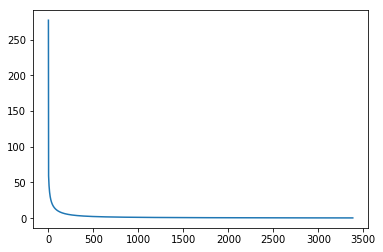

In [43]:
plt.plot(error)

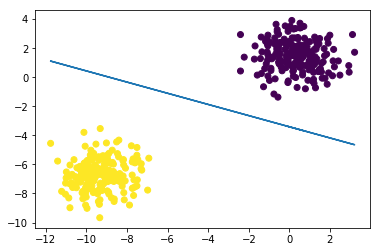

In [44]:
plt.scatter(X_train[:,0], X_train[:,1],c=Y_train)
X1 = X_train[:,0]
X2 = -1 * ((theta[0] + theta[1]*X1) / theta[2])
plt.plot(X1,X2)

#####  Prediction And Accuracy

In [45]:
Y_pred = predict(X_test,theta)

In [46]:
accuracy(Y_test, Y_pred)

1.0

# Example 2

#####  Data Prep.

In [47]:
X,Y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=50,shuffle=True)


In [48]:
# splitting into test and training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

#####  Running code

In [49]:
theta,error = LogisticRegression(X_train,Y_train)

In [50]:
theta

array([ 0.00918806,  1.86735419, -1.00940457])

#####  Plotting

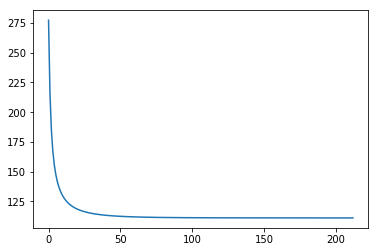

In [51]:
plt.plot(error)

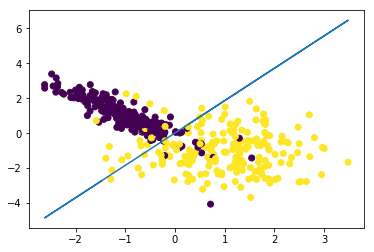

In [52]:
plt.scatter(X_train[:,0], X_train[:,1],c=Y_train)
X1 = X_train[:,0]
X2 = -1 * ((theta[0] + theta[1]*X1) / theta[2])
plt.plot(X1,X2)

#####  Prediction And Accuracy

In [53]:
Y_pred = predict(X_test,theta)

In [54]:
accuracy(Y_test, Y_pred)

0.91

# Using Sklearn to do it(`from sklearn.linear_model import LogisticRegression`)

#####  Model

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
X,Y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=50,shuffle=True)
# X,Y = make_blobs(n_samples=500, n_features=2, shuffle=True, random_state=101,centers=2)

In [57]:
# splitting into test and training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

#####  Running code

In [58]:
model = LogisticRegression(random_state=101, solver = 'lbfgs')

In [59]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=101, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
coef = model.coef_.flatten()
coef

array([ 1.79262942, -0.98106302])

In [61]:
bias = model.intercept_.flatten()
bias

array([0.00652824])

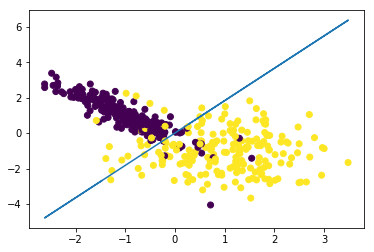

In [62]:
plt.scatter(X_train[:,0], X_train[:,1],c=Y_train)
X1 = X_train[:,0]
X2 = -1 * ((bias + coef[0]*X1) / coef[1])
plt.plot(X1,X2)

#####  Prediction And Accuracy

In [63]:
Y_pred = model.predict(X_test)

In [64]:
model.score(X_test,Y_pred)

1.0